# 计算方法实验

## 矩阵运算的相关函数定义

In [ ]:
# matrix operations
def mul_matrix(MA,MB):
  if len(MA[0])!=len(MB):
    print('dim error')
    return
  return [[sum(map(lambda a: a[0]*a[1], zip(l, s))) for l in zip(*MB)] for s in MA ]


def naive_swap(M,row_zero_index):
  swapA = M[row_zero_index]
  # 需要与index下的非0行交换
  for i in range(row_zero_index+1,len(M)):
    if M[i][row_zero_index]!=0:
      return swap(M,i,row_zero_index)
  print("不满足初等变换条件")
  return[[]]
  
def transpose(M):
  Mt = []
  for i in zip(*M):
    Mt.append(list(i))
  return Mt

# row operations
def sub(rowA,rowB):
  return [i-j for i,j in zip(rowA,rowB)]
def add(rowA,rowB):
  return [i+j for i,j in zip(rowA,rowB)]
def div(rowA,rowB):
  return [i/j for i,j in zip(rowA,rowB)]
def times(rowA,rowB):
  return [i*j for i,j in zip(rowA,rowB)]
def div_dig(row,dig):
  dig_l = [dig]*len(row)
  return div(row,dig_l)
def times_dig(row,dig):
  dig_l = [dig]*len(row)
  return times(row,dig_l)

def M_add(MA,MB):
  assert (len(MA)==len(MB))
  assert (len(MA[0])==len(MB[0]))
  C = []
  for i in range(len(MA)):
    C.append(add(MA[i],MB[i]))
  return C


def naive_tran(rowA,rowB,main_dig):
  '''
  @rowA updaterowA
  @rowB 主元
  @main_dig主元位置
  '''
  rowA_dig = rowA[main_dig]
  rowB_dig = rowB[main_dig]
  if rowA_dig == 0:
    return rowA
  fac = rowB_dig/rowA_dig
  rowA_update = sub(rowB.copy(),times_dig(rowA.copy(),fac))
  return rowA_update

def swap(A,i,j):
  tmp = A[i]
  A[i] = A[j]
  A[j] = tmp
  return A
# 求逆
def r(M):
  resM = M.copy()
  row_element = len(M[0])
  for index in range(len(M)):
    new_row = [0]*row_element
    new_row[index] = 1
    resM[index] = resM[index]+new_row
  for main_i in range(len(M)):
    main_row = resM[main_i].copy()
    diag_dig = resM[main_i][main_i]
    for tra in range(len(M)):
      if tra == main_i:
        continue
      if diag_dig == 0:
        resM = naive_swap(resM,main_i)
        if resM == [[]]:
          print("不满足求逆条件")
          return [[]]
      tran_row = resM[tra].copy()
      resM[tra]=naive_tran(main_row,tran_row,main_i)
    resM[main_i] = div_dig(resM[main_i],resM[main_i][main_i])
  return [row[row_element:] for row in resM] 

def make_diag(shape):
  diag = [[0]*shape for i in range(shape)]
  for i in range(shape):
    for j in range(shape):
      if i==j:
        diag[i][j]=1
      else :
        diag[i][j] = 0
  return diag

def mul_const(lmd,diag):
  size = len(diag)
  return [[ diag[i][j]*lmd for i  in range(size)] for j in range(size)]


### 使用numpy库验证运算结果

结果一致

In [ ]:
import numpy as np
B = np.array([[1,2,3,4],[2,3,1,2],[1,1,1,-1],[1,0,-2,6]])
print("numpy result: ")
print(np.linalg.inv(B))

B = [[1,2,3,4],[2,3,1,2],[1,1,1,-1],[1,0,-2,6]]
BI = r(B)
print("my result: ")
for i in BI:
  print(i)


numpy result: 
[[-0.05405405 -0.48648649  1.56756757  0.45945946]
 [-0.13513514  0.78378378 -1.08108108 -0.35135135]
 [ 0.2972973  -0.32432432  0.37837838 -0.02702703]
 [ 0.10810811 -0.02702703 -0.13513514  0.08108108]]
my result: 
[-0.05405405405405406, -0.48648648648648657, 1.567567567567568, 0.4594594594594594]
[-0.13513513513513514, 0.7837837837837838, -1.0810810810810811, -0.3513513513513513]
[0.29729729729729726, -0.3243243243243243, 0.37837837837837834, -0.027027027027027025]
[0.1081081081081081, -0.027027027027027018, -0.13513513513513514, 0.08108108108108107]


## 导入红酒品质的数据集

In [ ]:
def try_float(x):
    try:
        return float(x)
    except ValueError:
        return x

import csv
readin = []
with open("winequality-red.csv") as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    for row in spamreader:
      readin.append([try_float(i) for i in row])
readin = readin[1:]
print("total data size:{}".format(len(readin)))

total data size:1599


## 划分数据集

In [ ]:
def into_group(data_X,data_Y,group_num):
  num_per_group = int(len(data_X)/group_num)
  x=[]
  y=[]
  for i in range(group_num):
    x.append(data_X[i*num_per_group:(i+1)*num_per_group])
    y.append(data_Y[i*num_per_group:(i+1)*num_per_group])
  return x,y

def regression_func(coff,X,y):
  # X y are batch
  tar = transpose(y.copy())[0]
  pred = []
  for i in X:
    pred.append(sum(times(coff,i)))
  sqrt_error = [ (t-p)**2 for t,p in zip(tar,pred)]
  error = sum(sqrt_error)/len(sqrt_error)
  return error, pred

## 通过musk的方法定义五折交叉验证的函数 

In [ ]:
def train_regression(batch_X,batch_y,musk):
  test_X = None
  test_y = None
  train_X = []
  train_y = []
  index = -1
  for x,y in zip(batch_X,batch_y):
    index+=1
    if musk[index] == 0:
      test_X = x 
      test_y = y 
      continue
    else:
      train_X+=x
      train_y+=y
  theta = transpose(mul_matrix(mul_matrix(r(mul_matrix(transpose(train_X),train_X)),transpose(train_X)),train_y))[0]
  # train_error
  train_error,_ = regression_func(theta,train_X,train_y)
  # test_error
  test_error,_ = regression_func(theta,test_X,test_y)
  return train_error,test_error

def train_regression_L2(batch_X,batch_y,lmd,musk):
  test_X = None
  test_y = None
  train_X = []
  train_y = []
  index = -1
  for x,y in zip(batch_X,batch_y):
    index+=1
    if musk[index] == 0:
      test_X = x 
      test_y = y 
      continue
    else:
      train_X+=x
      train_y+=y
  XTX = mul_matrix(transpose(train_X),train_X)
  L2 = mul_const(lmd,make_diag(len(XTX)))
  Xtrain_L2 = M_add(XTX,L2)
  theta = transpose(mul_matrix(mul_matrix(r(   Xtrain_L2  ),transpose(train_X)),train_y))[0]
  # train_error
  train_error,_ = regression_func(theta,train_X,train_y)
  # test_error
  test_error,_ = regression_func(theta,test_X,test_y)
  return train_error,test_error
    

## 机器参数

In [ ]:
! cat /proc/cpuinfo

processor	: 0
vendor_id	: AuthenticAMD
cpu family	: 23
model		: 49
model name	: AMD EPYC 7B12
stepping	: 0
microcode	: 0x1000065
cpu MHz		: 2250.000
cache size	: 512 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_good nopl nonstop_tsc cpuid extd_apicid tsc_known_freq pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm cmp_legacy cr8_legacy abm sse4a misalignsse 3dnowprefetch osvw topoext ssbd ibrs ibpb stibp vmmcall fsgsbase tsc_adjust bmi1 avx2 smep bmi2 rdseed adx smap clflushopt clwb sha_ni xsaveopt xsavec xgetbv1 clzero xsaveerptr arat npt nrip_save umip rdpid
bugs		: sysret_ss_attrs spectre_v1 spectre_v2 spec_store_bypass
bogomips	: 4500.00
TLB size	: 3072 4K pages

# 用多变量线性模型拟合数据，并计算测试集的 _平方误差和平均值_ 、 _运行时间_ 和 _内存_

## 运行结果和耗时，avg-time cost是每一折使用的时间

avg-time cost 0.06781911849975586 s


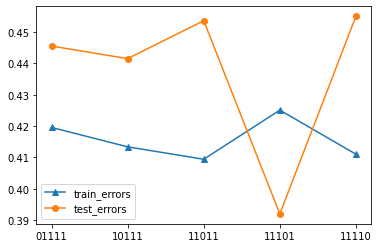

In [ ]:
data_X = [ [1]+row[:-1] for row in readin]
data_y = [ [row[-1]] for row in readin]

batch_X,batch_y = into_group(data_X,data_y,5)

names = ["01111","10111","11011","11101","11110"]
import time
import matplotlib.pyplot as plt
train_errors=[]
test_errors=[]
time_start=time.time()

for musk_test in range(5):
  musk = [1]*5
  musk[musk_test]=0
  train_error,test_error = train_regression(batch_X,batch_y,musk)
  train_errors.append(train_error)
  test_errors.append(test_error)

time_end=time.time()

print('avg-time cost',(time_end-time_start)/5,'s')

plt.plot(train_errors,'-^')
plt.plot(test_errors,'-o')
plt.xticks(range(5),names)

plt.legend(['train_errors','test_errors'])
plt.show()


# 用多变量线性模型拟合数据，使用L2正则项，重复上述实验

avg-time cost 0.07298885186513265 s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


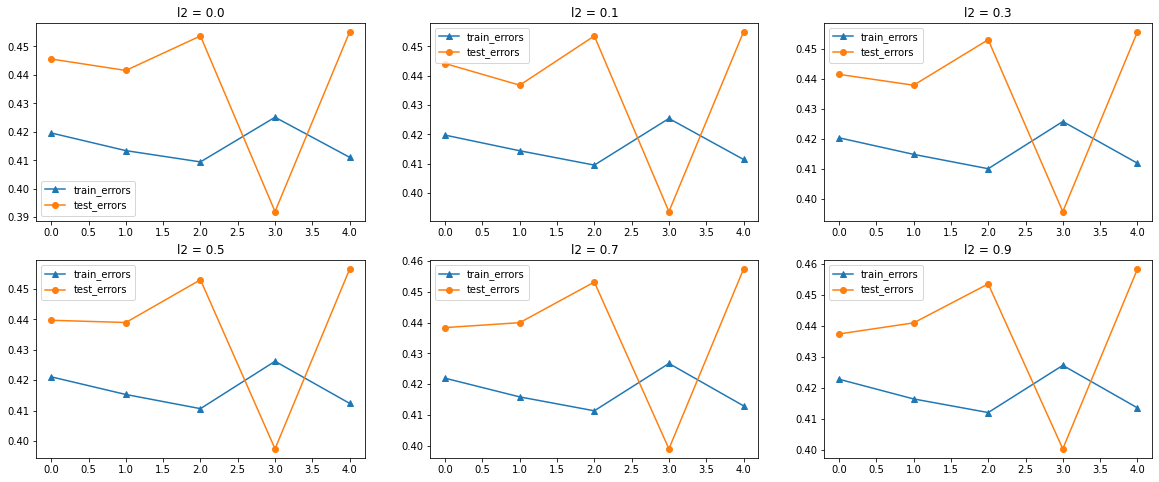

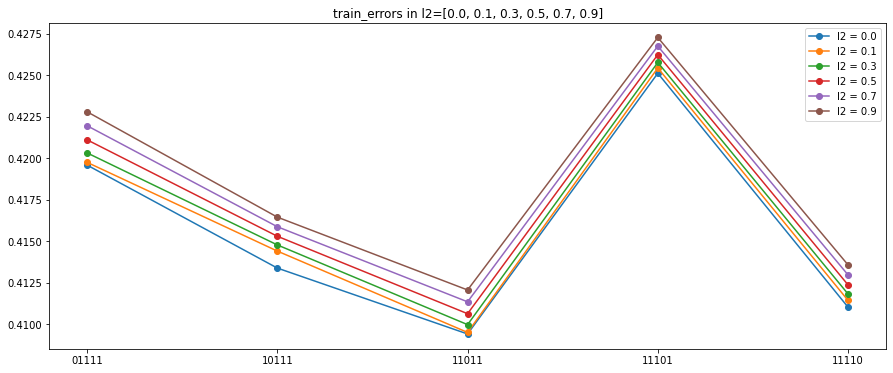

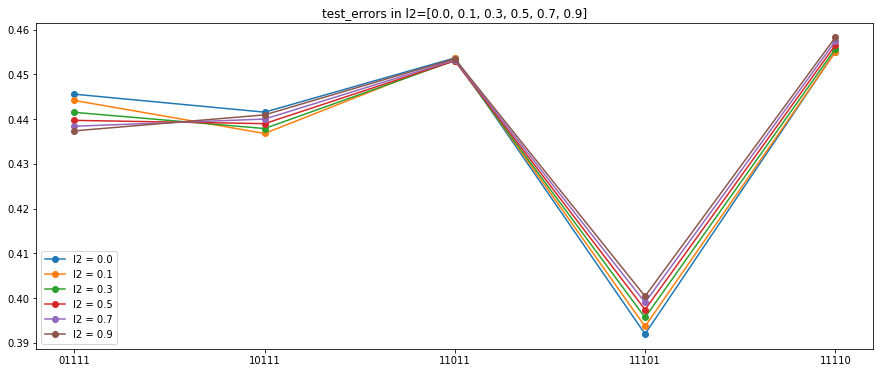

In [ ]:
data_X = [ [1]+row[:-1] for row in readin]
data_y = [ [row[-1]] for row in readin]

batch_X,batch_y = into_group(data_X,data_y,5)

names = ["01111","10111","11011","11101","11110"]

import time
import matplotlib.pyplot as plt
train_errors=[]
test_errors=[]
time_start=time.time()
l2s = [0.0,0.1,0.3,0.5,0.7,0.9]
train_errors_in_l2=[]
test_errors_in_l2 = []
for l2 in l2s:
    train_errors=[]
    test_errors=[]
    for musk_test in range(5):
        musk = [1]*5
        musk[musk_test]=0
        train_error,test_error = train_regression_L2(batch_X,batch_y,l2,musk)
        train_errors.append(train_error)
        test_errors.append(test_error)
    train_errors_in_l2.append(train_errors)
    test_errors_in_l2.append(test_errors)

time_end=time.time()

print('avg-time cost',(time_end-time_start)/(5*len(l2s)),'s')

fig = plt.figure(figsize=(20, 8))
for i in range(1, 7):
    index = i -1
    ax = fig.add_subplot(2, 3, i)
    ax.plot(train_errors_in_l2[index],'-^')
    ax.plot(test_errors_in_l2[index],'-o')
    ax.set_xticks(range(5),names)
    ax.set_title("l2 = {}".format(l2s[index]))
    ax.legend(['train_errors','test_errors'])


plt.show()

fig = plt.figure(figsize=(15, 6))
for i in range(1,7):
    index = i-1
    plt.plot(train_errors_in_l2[index],'-o')
    plt.legend(['l2 = {}'.format(n) for n in l2s] )

plt.xticks(range(5),names)

plt.title('train_errors in l2={}'.format(l2s))

plt.show()

fig = plt.figure(figsize=(15, 6))
for i in range(1,7):
    index = i-1
    plt.plot(test_errors_in_l2[index],'-o')
    plt.legend(['l2 = {}'.format(n) for n in l2s] )

plt.xticks(range(5),names)

plt.title('test_errors in l2={}'.format(l2s))

plt.show()




## 检查消耗的内存

In [ ]:
!pip install memory-profiler

  Created wheel for memory-profiler: filename=memory_profiler-0.58.0-cp37-none-any.whl size=30180 sha256=e74a075916b73f20d4bbea1ca32dfe3f53bf2d1d9d9159bcf10d19c321a29bb5
  Stored in directory: /root/.cache/pip/wheels/02/e4/0b/aaab481fc5dd2a4ea59e78bc7231bb6aae7635ca7ee79f8ae5
Successfully built memory-profiler


In [ ]:
!mprof run --include-children --multiprocess memory_record.py

mprof: Sampling memory every 0.1s
running new process
Filename: memory_record.py

Line #    Mem usage    Increment  Occurences   Line Contents
    99     39.6 MiB     39.6 MiB           1   @profile
   100                                         def load_file(file_name):
   101     39.6 MiB      0.0 MiB           1     import csv
   102     39.6 MiB      0.0 MiB           1     readin = []
   103     39.6 MiB      0.0 MiB           1     with open(file_name) as csvfile:
   104     39.6 MiB      0.0 MiB           1         spamreader = csv.reader(csvfile, delimiter=';')
   105     40.5 MiB      0.0 MiB        1601         for row in spamreader:
   106     40.5 MiB      0.9 MiB       24000           readin.append([try_float(i) for i in row])
   107     40.5 MiB      0.0 MiB           1     readin = readin[1:]
   108     40.5 MiB      0.0 MiB           1     return readin


Filename: memory_record.py

Line #    Mem usage    Increment  Occurences   Line Contents
     4     41.3 MiB     41.

In [ ]:
!mprof plot --flame -o pic.png

Using last profile data.
